<a href="https://colab.research.google.com/github/Erandi0011/Correlations/blob/main/Correlation1st.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Project

In [3]:
#Librerías a usar 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random
import statistics as stats
from random import randint
from pylab import *
import sympy as sp
from scipy.integrate import quad
from scipy import stats
from IPython.display import display, HTML
from IPython.display import Image
from scipy.signal import savgol_filter
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 1. Vizualización de datos

In [4]:
datos=pd.ExcelFile("datos.xlsx")

In [5]:
print(datos.sheet_names)

['Controles', 'Moderados', 'Graves']


In [6]:
df=datos.parse('Controles')

In [7]:
#print(df)

In [8]:
display(HTML(df.to_html()))

,Identificación,"Género. Fem 0, Masc 1",Edad (años),IMC (kg/m2),Comorbilidad. Obesidad,Comorbilidad. Hipertensión,Comorbilidad. Diabetes,"PCR COVID-19, 0 es negativa",Días de Evolución,Infuficiencia respiratoria moderada,Insuficiencia respiratoria severa,Muerte,Hemogobina g/dL,eritrocitos (millón/ul),plaquetas (mil/ul,leucocitos (mil/ul),linfocitos (% leucocitos),eosinófilos (% leucocitos),neutrófilos (%leucocitos),glucosa (mg/dL),urea (mg/dL),creatinina (mg/dL),proteína C reactiva (mg/dL) se puso 4 cuando es <5,colesterol total (mg/dL),HDL (mg/dL),triglicéridos (mg/dL),nitratos (nM/mg prot),Hemoglobina libre (pg/ml por mg de proteína),procalcitonina (pg/ml por mg proteína)
0,1C,1,49,24.20,0,0,0,0,NaN,NaN,NaN,NaN,15.9,4.62,235,5.90,25.42373,0.881356,71.18644,92,14,0.9,4.0,220,33,174,544.6105,47.598130,2.868866
1,2C,1,41,24.30,0,0,0,0,NaN,NaN,NaN,NaN,15.2,4.83,345,6.70,47.76119,0.417911,47.76119,68,17,0.9,4.0,161,60,132,188.0828,15.612710,5.230215
2,3C,0,22,24.08,0,0,0,0,NaN,NaN,NaN,NaN,14.8,4.28,325,6.80,20.68966,3.448276,74.13793,81,10,0.7,4.0,177,60,160,286.0649,20.913400,9.896350
3,4C,1,23,23.38,0,0,0,0,NaN,NaN,NaN,NaN,15.7,4.39,231,7.50,24.00000,0.466667,74.66666,88,11,0.9,6.6,198,46,174,588.4131,28.399710,3.354791
4,5C,0,24,27.10,0,0,0,0,NaN,NaN,NaN,NaN,14.2,4.44,398,6.80,36.76471,3.529412,58.82353,84,11,0.6,4.0,116,46,67,441.8936,23.907410,3.837205
5,6C,0,23,25.29,0,0,0,0,NaN,NaN,NaN,NaN,13.9,4.56,356,7.70,29.87013,0.727273,68.83117,69,14,0.6,4.0,178,53,86,419.4132,21.253710,1.960554
6,7C,0,30,28.30,0,0,0,0,NaN,NaN,NaN,NaN,14.4,4.87,372,6.67,37.48126,2.698651,56.97152,85,12,0.6,4.0,179,52,112,531.4137,21.374200,5.466750
7,8C,1,25,24.90,0,0,0,0,NaN,NaN,NaN,NaN,15.5,4.82,298,6.00,25.00000,3.333333,71.66666,90,16,0.1,4.0,136,38,181,468.6645,67.508010,17.475680
8,9C,0,51,24.03,0,0,0,0,NaN,NaN,NaN,NaN,14.3,4.75,356,5.40,35.18518,4.444445,61.11111,85,13,0.8,4.0,213,78,154,390.4238,18.927570,2.028421
9,10C,0,49,29.01,0,0,0,0,NaN,NaN,NaN,NaN,13.8,4.65,246,4.60,32.60870,3.913043,63.04348,85,7,0.6,6.6,171,44,106,1053.2780,21.087850,1.724976


*2*.-Descripción de los datos

In [9]:
df.describe()

,"Género. Fem 0, Masc 1",Edad (años),IMC (kg/m2),Comorbilidad. Obesidad,Comorbilidad. Hipertensión,Comorbilidad. Diabetes,"PCR COVID-19, 0 es negativa",Días de Evolución,Infuficiencia respiratoria moderada,Insuficiencia respiratoria severa,Muerte,Hemogobina g/dL,eritrocitos (millón/ul),plaquetas (mil/ul,leucocitos (mil/ul),linfocitos (% leucocitos),eosinófilos (% leucocitos),neutrófilos (%leucocitos),glucosa (mg/dL),urea (mg/dL),creatinina (mg/dL),proteína C reactiva (mg/dL) se puso 4 cuando es <5,colesterol total (mg/dL),HDL (mg/dL),triglicéridos (mg/dL),nitratos (nM/mg prot),Hemoglobina libre (pg/ml por mg de proteína),procalcitonina (pg/ml por mg proteína)
count,43.000000,43.000000,43.000000,43.0,43.0,43.0,43.0,0.0,0.0,0.0,0.0,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,0.534884,33.558140,25.323953,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,15.062791,4.627209,345.744186,6.569070,36.512963,3.189143,59.087348,88.139535,13.906977,0.772093,4.262791,174.511628,52.604651,142.604651,673.287163,25.262681,3.633035
std,0.504685,9.284658,2.578264,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.821446,0.247447,43.591771,1.193472,8.941423,1.407217,9.488706,11.419660,3.198318,0.239370,0.757824,27.257478,14.847061,54.610805,492.247878,11.676226,3.400451
min,0.000000,20.000000,19.060000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,13.700000,4.230000,231.000000,4.500000,20.689660,0.417911,34.693880,66.000000,7.000000,0.100000,4.000000,116.000000,25.000000,54.000000,188.082800,8.895552,0.348421
25%,0.000000,24.000000,24.055000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,14.250000,4.380000,326.500000,5.850000,30.014430,2.705258,55.500000,82.500000,11.000000,0.600000,4.000000,158.000000,44.500000,98.000000,390.127300,17.941745,1.974823
50%,1.000000,33.000000,25.290000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,15.200000,4.650000,345.000000,6.700000,37.179490,3.428571,58.461540,90.000000,14.000000,0.800000,4.000000,177.000000,51.000000,151.000000,531.413700,21.374200,2.763229
75%,1.000000,40.000000,27.510000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,15.800000,4.860000,383.500000,7.450000,40.588235,3.850540,65.352185,92.000000,16.500000,0.900000,4.000000,192.500000,57.500000,170.000000,777.008800,31.388000,3.701033
max,1.000000,51.000000,29.060000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,16.200000,4.990000,398.000000,8.900000,59.183670,6.938776,74.666660,120.000000,20.000000,1.300000,6.700000,230.000000,95.000000,317.000000,2490.863000,67.508010,17.475680


*2*.-Medidas de tendencia central

In [10]:
stats.gmean(df[df["Edad (años)"] > 0].loc[:,['Edad (años)']])

array([32.28614788])

In [11]:
stats.hmean(df[df["Edad (años)"] > 0].loc[:,['Edad (años)']])

array([31.03022644])

In [12]:
datos1=pd.ExcelFile("datos1.xlsx")

In [13]:
df1=datos1.parse('Controles1')

In [14]:
display(HTML(df1.to_html()))

,Género_Fem0_Masc1,Edad,IMC,Hemogobina,eritrocitos,plaquetas,leucocitos,linfocitos,eosinófilos,neutrófilos,glucosa,urea,creatinina,prot_reac,colesterol_total,HDL,triglicéridos,nitratos,Hemo_libre,procalcitonina
0,1,49,24.20,15.9,4.62,235,5.90,25.42373,0.881356,71.18644,92,14,0.9,4.0,220,33,174,544.6105,47.598130,2.868866
1,1,41,24.30,15.2,4.83,345,6.70,47.76119,0.417911,47.76119,68,17,0.9,4.0,161,60,132,188.0828,15.612710,5.230215
2,0,22,24.08,14.8,4.28,325,6.80,20.68966,3.448276,74.13793,81,10,0.7,4.0,177,60,160,286.0649,20.913400,9.896350
3,1,23,23.38,15.7,4.39,231,7.50,24.00000,0.466667,74.66666,88,11,0.9,6.6,198,46,174,588.4131,28.399710,3.354791
4,0,24,27.10,14.2,4.44,398,6.80,36.76471,3.529412,58.82353,84,11,0.6,4.0,116,46,67,441.8936,23.907410,3.837205
5,0,23,25.29,13.9,4.56,356,7.70,29.87013,0.727273,68.83117,69,14,0.6,4.0,178,53,86,419.4132,21.253710,1.960554
6,0,30,28.30,14.4,4.87,372,6.67,37.48126,2.698651,56.97152,85,12,0.6,4.0,179,52,112,531.4137,21.374200,5.466750
7,1,25,24.90,15.5,4.82,298,6.00,25.00000,3.333333,71.66666,90,16,0.1,4.0,136,38,181,468.6645,67.508010,17.475680
8,0,51,24.03,14.3,4.75,356,5.40,35.18518,4.444445,61.11111,85,13,0.8,4.0,213,78,154,390.4238,18.927570,2.028421
9,0,49,29.01,13.8,4.65,246,4.60,32.60870,3.913043,63.04348,85,7,0.6,6.6,171,44,106,1053.2780,21.087850,1.724976


## 2. Correlación de Pearson

\begin{equation} \boxed{
 r= \frac{\sigma_{xy}}{ \sigma_{x} \sigma_{y}}}
\end{equation}

##### r es un coeficiente sin unidades
##### -1 $\leq$ r $\leq$ 1

In [15]:
df1.corr()

,Género_Fem0_Masc1,Edad,IMC,Hemogobina,eritrocitos,plaquetas,leucocitos,linfocitos,eosinófilos,neutrófilos,glucosa,urea,creatinina,prot_reac,colesterol_total,HDL,triglicéridos,nitratos,Hemo_libre,procalcitonina
Género_Fem0_Masc1,1.000000,-0.192258,-0.276134,0.870424,0.130443,-0.070472,0.103226,0.053862,-0.092582,-0.044276,0.052841,0.533079,0.382718,-0.002751,-0.068829,-0.396896,0.217777,-0.004087,0.381059,0.041158
Edad,-0.192258,1.000000,-0.050233,-0.204812,0.163607,-0.098057,-0.207493,0.137845,0.013771,-0.117489,-0.051727,-0.132110,-0.026035,0.117059,0.142317,0.100953,0.029841,0.102199,-0.054186,-0.097957
IMC,-0.276134,-0.050233,1.000000,-0.251548,0.240018,0.025058,-0.134939,0.058130,0.166407,-0.101332,-0.096073,-0.157893,-0.030333,0.064041,-0.173029,-0.026586,0.026105,0.175341,0.029225,0.129365
Hemogobina,0.870424,-0.204812,-0.251548,1.000000,0.065776,-0.074610,0.195055,-0.025575,-0.076952,0.031218,0.063767,0.501623,0.362702,-0.115107,-0.048151,-0.377235,0.317321,0.044292,0.477238,0.097434
eritrocitos,0.130443,0.163607,0.240018,0.065776,1.000000,0.016664,-0.019907,0.022574,-0.037845,-0.017957,-0.016879,0.186491,-0.054809,0.104945,0.052073,0.026588,-0.030072,-0.108444,0.126411,0.082799
plaquetas,-0.070472,-0.098057,0.025058,-0.074610,0.016664,1.000000,0.288265,0.169551,0.093020,-0.160728,-0.024750,0.039445,-0.063450,-0.334285,-0.130597,0.069516,-0.038690,0.104106,-0.229457,-0.026706
leucocitos,0.103226,-0.207493,-0.134939,0.195055,-0.019907,0.288265,1.000000,-0.497833,-0.386871,0.512447,0.105649,0.182364,0.055747,-0.253260,-0.120742,-0.073225,-0.023305,-0.032753,0.084020,0.114488
linfocitos,0.053862,0.137845,0.058130,-0.025575,0.022574,0.169551,-0.497833,1.000000,0.217432,-0.988266,-0.143138,0.017108,0.228019,0.021458,-0.021853,0.076178,0.020831,0.114901,-0.233288,-0.305304
eosinófilos,-0.092582,0.013771,0.166407,-0.076952,-0.037845,0.093020,-0.386871,0.217432,1.000000,-0.322293,0.298283,-0.050709,-0.087582,-0.115166,-0.203080,0.114988,-0.032977,0.098962,-0.236035,-0.142091
neutrófilos,-0.044276,-0.117489,-0.101332,0.031218,-0.017957,-0.160728,0.512447,-0.988266,-0.322293,1.000000,0.126792,-0.022735,-0.241907,0.018458,0.042504,-0.093665,-0.031447,-0.093143,0.262686,0.315043


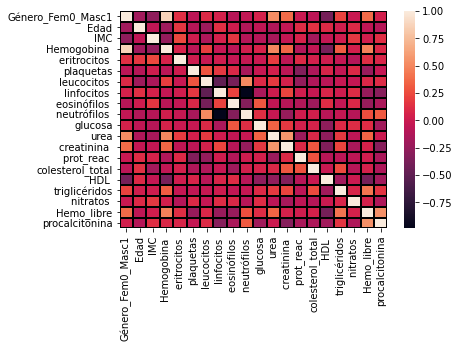

In [16]:
sns.heatmap(df1.corr(),linewidth=1,linecolor='black');

### 2.1 Hemoglobina y eritrocitos







In [17]:
x=df1.iloc[:,3]
y=df1.iloc[:,4]

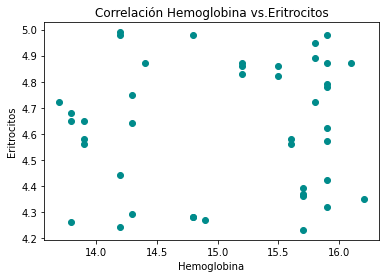

In [18]:
plt.title('Correlación Hemoglobina vs.Eritrocitos')
plt.plot(x,y,'o',color='darkcyan')
plt.xlabel('Hemoglobina')
plt.ylabel('Eritrocitos')
plt.show()

In [19]:
sum_hemo=x.sum()
sum_eritr=y.sum()
sum_hemo_cuadrado=sum(x*x)
sum_eritr_cuadrado=sum(y*y)
sumxy=sum(x*y)
prom_hemo=x.mean()
prom_eritr=y.mean()
m=(43*sumxy - sum_hemo*sum_eritr)/(43*sum_hemo_cuadrado - sum_hemo**2)
b=prom_eritr - m* prom_hemo

In [20]:
print(m,b)

0.019813890894752217 4.328756810871372


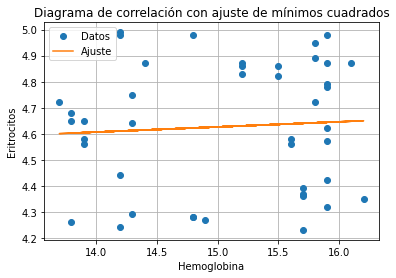

In [21]:
plt.plot(x,y,'o',label='Datos')
plt.plot(x,m*x+b,label='Ajuste')
plt.xlabel('Hemoglobina')
plt.ylabel('Eritrocitos')
plt.title('Diagrama de correlación con ajuste de mínimos cuadrados')
plt.grid()
plt.legend()
plt.show()

In [22]:
sigma_hemo= np.sqrt(sum_hemo_cuadrado/43 - prom_hemo**2)
sigma_eritr = np.sqrt(sum_eritr_cuadrado/43 - prom_eritr**2)
sigma_xy = sumxy/43 - prom_hemo*prom_eritr
R= sigma_xy/(sigma_hemo*sigma_eritr)
print('El coeficiente de correlación es')
print(R)

El coeficiente de correlación es
0.06577578608634943


### 2.2 Eritrocitos y leucocitos

In [23]:
x1=df1.iloc[:,4]
y1=df1.iloc[:,6]

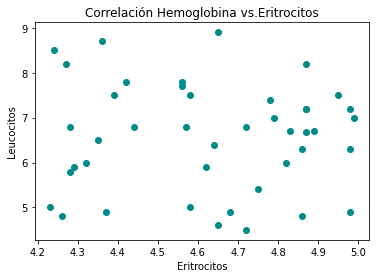

In [24]:
plt.title('Correlación Hemoglobina vs.Eritrocitos')
plt.plot(x1,y1,'o',color='darkcyan')
plt.xlabel('Eritrocitos')
plt.ylabel('Leucocitos')
plt.show()

In [25]:
sum_eritr=x1.sum()
sum_leuco=y1.sum()
sum_eritr_cuadrado=sum(x1*x1)
sum_leuco_cuadrado=sum(y1*y1)
sumx1y1=sum(x1*y1)
prom_eritr=x1.mean()
prom_leuco=y1.mean()
m1=(43*sumx1y1 - sum_eritr*sum_leuco)/(43*sum_eritr_cuadrado - sum_eritr**2)
b1=prom_leuco - m1* prom_eritr
print(m1,b1)

-0.09601235648620897 7.013339036513047


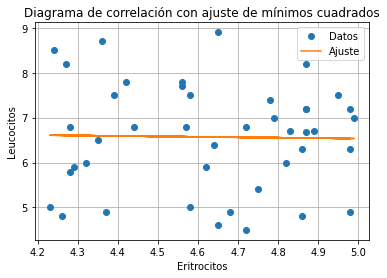

In [26]:
plt.plot(x1,y1,'o',label='Datos')
plt.plot(x1,m1*x1+b1,label='Ajuste')
plt.xlabel('Eritrocitos')
plt.ylabel('Leucocitos')
plt.title('Diagrama de correlación con ajuste de mínimos cuadrados')
plt.grid()
plt.legend()
plt.show()

In [27]:
sigma_eritr= np.sqrt(sum_eritr_cuadrado/43 - prom_eritr**2)
sigma_leuco = np.sqrt(sum_leuco_cuadrado/43 - prom_leuco**2)
sigma_x1y1 = sumx1y1/43 - prom_eritr*prom_leuco
R2= sigma_x1y1/(sigma_eritr*sigma_leuco)
print('El coeficiente de correlación es')
print(R2)

El coeficiente de correlación es
-0.019906617560204353


### 2.3 Plaquetas y linfocitos

In [28]:
x2=df1.iloc[:,5]
y2=df1.iloc[:,7]

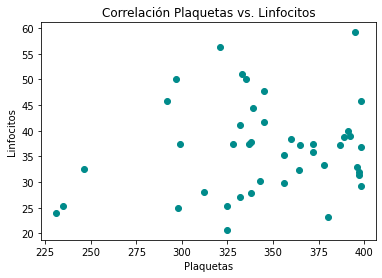

In [29]:
plt.title('Correlación Plaquetas vs. Linfocitos')
plt.plot(x2,y2,'o',color='darkcyan')
plt.xlabel('Plaquetas')
plt.ylabel('Linfocitos')
plt.show()

In [30]:
sum_plaq=x2.sum()
sum_linf=y2.sum()
sum_plaq_cuadrado=sum(x2*x2)
sum_linf_cuadrado=sum(y2*y2)
sumx2y2=sum(x2*y2)
prom_plaq=x2.mean()
prom_linf=y2.mean()
m2=(43*sumx2y2 - sum_plaq*sum_linf)/(43*sum_plaq_cuadrado - sum_plaq**2)
b2=prom_linf - m2* prom_plaq

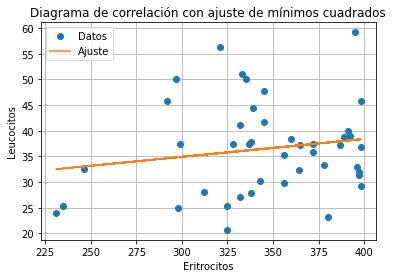

In [31]:
plt.plot(x2,y2,'o',label='Datos')
plt.plot(x2,m2*x2+b2,label='Ajuste')
plt.xlabel('Eritrocitos')
plt.ylabel('Leucocitos')
plt.title('Diagrama de correlación con ajuste de mínimos cuadrados')
plt.grid()
plt.legend()
plt.show()

In [32]:
sigma_plaq= np.sqrt(sum_plaq_cuadrado/43 - prom_plaq**2)
sigma_linf = np.sqrt(sum_linf_cuadrado/43 - prom_linf**2)
sigma_x3y3 = sumx2y2/43 - prom_plaq*prom_linf
R3= sigma_x3y3/(sigma_plaq*sigma_linf)
print('El coeficiente de correlación es')
print(R3)

El coeficiente de correlación es
0.16955125106940616


### 2.4 Linfocitos y eosinófilos

In [33]:
x4=df1.iloc[:,7]
y4=df1.iloc[:,8]

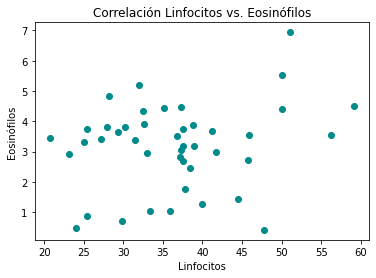

In [34]:
plt.title('Correlación Linfocitos vs. Eosinófilos')
plt.plot(x4,y4,'o',color='darkcyan')
plt.xlabel('Linfocitos')
plt.ylabel('Eosinófilos')
plt.show()

In [35]:
sum_linf=x4.sum()
sum_eosi=y4.sum()
sum_linf_cuadrado=sum(x4*x4)
sum_eosi_cuadrado=sum(y4*y4)
sumx4y4=sum(x4*y4)
prom_linf=x4.mean()
prom_eosi=y4.mean()
m4=(43*sumx4y4 - sum_linf*sum_eosi)/(43*sum_linf_cuadrado - sum_linf**2)
b4=prom_eosi - m4* prom_linf

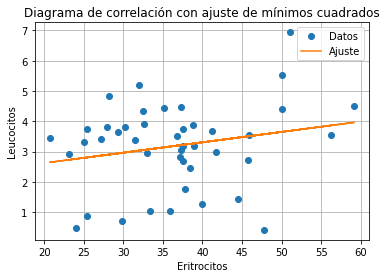

In [36]:
plt.plot(x4,y4,'o',label='Datos')
plt.plot(x4,m4*x4+b4,label='Ajuste')
plt.xlabel('Eritrocitos')
plt.ylabel('Leucocitos')
plt.title('Diagrama de correlación con ajuste de mínimos cuadrados')
plt.grid()
plt.legend()
plt.show()

In [37]:
sigma_linf= np.sqrt(sum_linf_cuadrado/43 - prom_linf**2)
sigma_eosi = np.sqrt(sum_eosi_cuadrado/43 - prom_eosi**2)
sigma_x4y4 = sumx4y4/43 - prom_linf*prom_eosi 
R4= sigma_x4y4/(sigma_linf*sigma_eosi)
print('El coeficiente de correlación es')
print(R4)

El coeficiente de correlación es
0.21743184002201252


### 2.5 Eosinófilos vs Neutrófilos

In [38]:
x5=df1.iloc[:,8]
y5=df1.iloc[:,9]

In [39]:
sum_eos=x5.sum()
sum_neut=y5.sum()
sum_eos_cuadrado=sum(x5*x5)
sum_neut_cuadrado=sum(y5*y5)
sumx5y5=sum(x5*y5)
prom_eos=x5.mean()
prom_neut=y5.mean()
m5=(43*sumx5y5 - sum_eos*sum_neut)/(43*sum_eos_cuadrado - sum_eos**2)
b5=prom_neut - m5* prom_eos

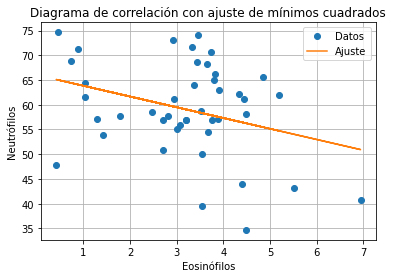

In [40]:
plt.plot(x5,y5,'o',label='Datos')
plt.plot(x5,m5*x5+b5,label='Ajuste')
plt.xlabel('Eosinófilos')
plt.ylabel('Neutrófilos')
plt.title('Diagrama de correlación con ajuste de mínimos cuadrados')
plt.grid()
plt.legend()
plt.show()

In [41]:
sigma_eos= np.sqrt(sum_eos_cuadrado/43 - prom_eos**2)
sigma_neut = np.sqrt(sum_neut_cuadrado/43 - prom_neut**2)
sigma_x5y5 = sumx5y5/43 - prom_eos*prom_neut
R5= sigma_x5y5/(sigma_eos*sigma_neut)
print('El coeficiente de correlación es')
print(R5)

El coeficiente de correlación es
-0.32229305918261836


### 2.6  Glucosa vs Urea

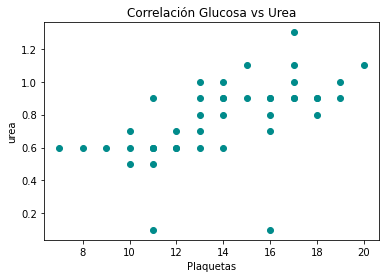

In [42]:
x6=df1.iloc[:,11]
y6=df1.iloc[:,12]
plt.title('Correlación Glucosa vs Urea')
plt.plot(x6,y6,'o',color='darkcyan')
plt.xlabel('Plaquetas')
plt.ylabel('urea')
plt.show()

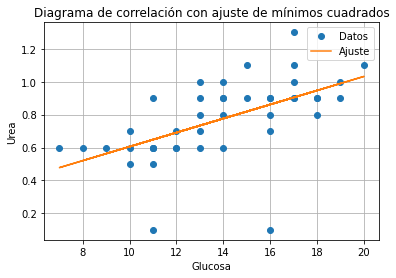

In [43]:

sum_Glucosa=x6.sum()
sum_u=y6.sum()
sum_G_cuadrado=sum(x6*x6)
sum_u_cuadrado=sum(y6*y6)
sumx6y6=sum(x6*y6)
m6=(43*sumx6y6 - sum_Glucosa*sum_u)/(43*sum(x6*x6)- sum_Glucosa**2)
b6=y6.mean() - m6* x6.mean()

plt.plot(x6,y6,'o',label='Datos')
plt.plot(x6,m6*x6+b6,label='Ajuste')
plt.xlabel('Glucosa')
plt.ylabel('Urea')
plt.title('Diagrama de correlación con ajuste de mínimos cuadrados')
plt.grid()
plt.legend()
plt.show()

In [44]:
prom_G=x6.mean()
prom_u=y6.mean()
sigma_G= np.sqrt(sum_G_cuadrado/43 -prom_G**2)
sigma_u = np.sqrt(sum_u_cuadrado/43 - prom_u**2)
sigma_x6y6 = sumx6y6/43 - prom_G*prom_u
R6= sigma_x6y6/(sigma_G*sigma_u)
print('El coeficiente de correlación es')
print(R6)

El coeficiente de correlación es
0.5687675691378683


### 2.7 Glucosa vs colesterol

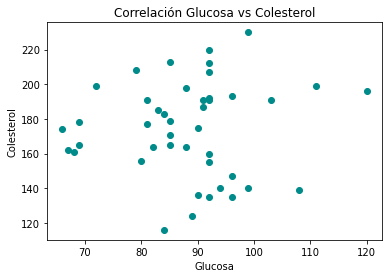

In [45]:
x7=df1.iloc[:,10]
y7=df1.iloc[:,14]
plt.title('Correlación Glucosa vs Colesterol')
plt.plot(x7,y7,'o',color='darkcyan')
plt.xlabel('Glucosa')
plt.ylabel('Colesterol')
plt.show()

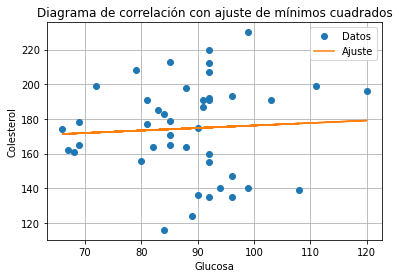

In [46]:
sum_Glucosa=x7.sum()
sum_c=y7.sum()
sum_G_cuadrado=sum(x7*x7)
sum_c_cuadrado=sum(y7*y7)
sumx7y7=sum(x7*y7)
m7=(43*sumx7y7 - sum_Glucosa*sum_c)/(43*sum(x7*x7)- sum_Glucosa**2)
b7=y7.mean() - m7* x7.mean()

plt.plot(x7,y7,'o',label='Datos')
plt.plot(x7,m7*x7+b7,label='Ajuste')
plt.xlabel('Glucosa')
plt.ylabel('Colesterol')
plt.title('Diagrama de correlación con ajuste de mínimos cuadrados')
plt.grid()
plt.legend()
plt.show()

In [47]:
prom_G=x7.mean()
prom_c=y7.mean()
sigma_Glucosa= np.sqrt(sum_G_cuadrado/43 - prom_G**2)
sigma_Col = np.sqrt(sum_c_cuadrado/43 - prom_c**2)
sigma_x7y7 = sumx7y7/43 - prom_G*prom_c
R7= sigma_x7y7/(sigma_Glucosa*sigma_Col)
print('El coeficiente de correlación es')
print(R7)

El coeficiente de correlación es
0.0603462741067733


### 2.8 Urea vs Creatinina

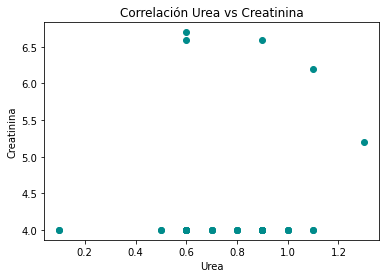

In [48]:
x8=df1.iloc[:,12]
y8=df1.iloc[:,13]
plt.title('Correlación Urea vs Creatinina')
plt.plot(x8,y8,'o',color='darkcyan')
plt.xlabel('Urea')
plt.ylabel('Creatinina')
plt.show()

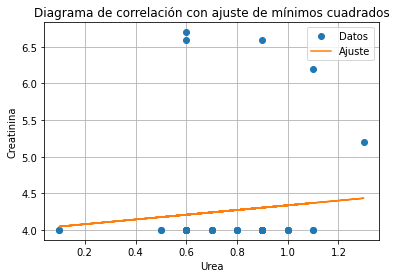

In [49]:
sum_urea=x8.sum()
sum_c=y8.sum()
sum_urea_cuadrado=sum(x8*x8)
sum_c_cuadrado=sum(y8*y8)
sumx8y8=sum(x8*y8)
m8=(43*sumx8y8 - sum_urea*sum_c)/(43*sum(x8*x8)- sum_urea**2)
b8=y8.mean() - m8* x8.mean()

plt.plot(x8,y8,'o',label='Datos')
plt.plot(x8,m8*x8+b8,label='Ajuste')
plt.xlabel('Urea')
plt.ylabel('Creatinina')
plt.title('Diagrama de correlación con ajuste de mínimos cuadrados')
plt.grid()
plt.legend()
plt.show()

In [50]:
prom_urea=x8.mean()
prom_c=y8.mean()
sigma_urea= np.sqrt(sum_urea_cuadrado/43 -prom_urea**2)
sigma_c = np.sqrt(sum_c_cuadrado/43 - prom_c**2)
sigma_x8y8 = sumx8y8/43 - prom_c*prom_urea
R8= sigma_x8y8/(sigma_c*sigma_urea)
print('El coeficiente de correlación es')
print(R8)

El coeficiente de correlación es
0.10176778419048131


### 2.9 Trigliceridos vs nitratos

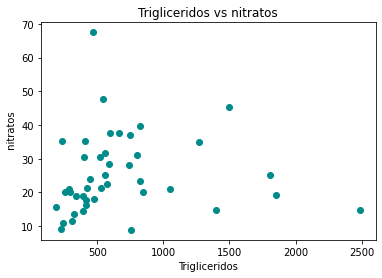

In [51]:
x9=df1.iloc[:,17]
y9=df1.iloc[:,18]
plt.title('Trigliceridos vs nitratos')
plt.plot(x9,y9,'o',color='darkcyan')
plt.xlabel('Trigliceridos')
plt.ylabel(' nitratos')
plt.show()

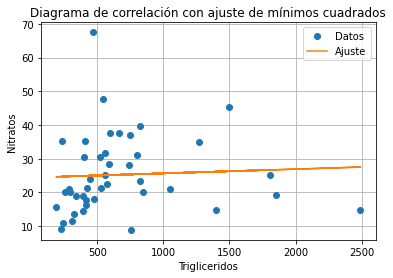

In [52]:
sum_T=x9.sum()
sum_n=y9.sum()
sum_T_cuadrado=sum(x9*x9)
sum_n_cuadrado=sum(y9*y9)
sumx9y9=sum(x9*y9)
m9=(43*sumx9y9 - sum_T*sum_n)/(43*sum(x9*x9)- sum_T**2)
b9=y9.mean() - m9* x9.mean()

plt.plot(x9,y9,'o',label='Datos')
plt.plot(x9,m9*x9+b9,label='Ajuste')
plt.xlabel('Trigliceridos')
plt.ylabel('Nitratos')
plt.title('Diagrama de correlación con ajuste de mínimos cuadrados')
plt.grid()
plt.legend()
plt.show()

In [53]:
prom_T=x9.mean()
prom_n=y9.mean()
sigma_T= np.sqrt(sum_T_cuadrado/43 -prom_T**2)
sigma_n = np.sqrt(sum_T_cuadrado/43 - prom_n**2)
sigma_x9y9 = sumx9y9/43 - prom_n*prom_T
R9= sigma_x9y9/(sigma_n*sigma_T)
print('El coeficiente de correlación es')
print(R9)

El coeficiente de correlación es
0.0007331422718668168


In [54]:
df2=datos1.parse('Hoja2')

In [55]:
display(HTML(df2.to_html()))

,Género_Fem0_Masc1,Edad,IMC,Hemogobina,eritrocitos,plaquetas,leucocitos,linfocitos,eosinófilos,neutrófilos,glucosa,urea,creatinina,prot_reac,colesterol_total,HDL,triglicéridos,nitratos,Hemo_libre,procalcitonina
0,0,57.0,NaN,13.7,4.48,234.0,20.37,0.024,0.02,19.94,216.0,66.3,1.13,NaN,154.0,41.0,150.0,2118.12900,56.295030,8.957713
1,1,58.0,28.7,15.0,5.30,360.0,8.42,5.500,1.00,85.40,141.0,38.5,0.69,67.20,126.0,NaN,164.0,201.59100,3.490109,5.398104
2,1,63.0,30.9,15.2,4.84,333.0,10.94,1.030,0.03,9.03,124.0,36.4,0.58,34.30,89.0,21.3,148.0,NaN,NaN,5.283103
3,0,47.0,NaN,11.5,5.25,234.0,7.33,0.400,0.30,5.19,76.0,27.8,0.52,NaN,108.0,28.6,101.0,401.77550,14.143520,13.776290
4,1,53.0,NaN,13.6,4.66,310.0,4.22,15.900,0.20,77.20,238.0,34.2,0.59,11.50,200.0,22.7,209.0,365.90010,21.741720,5.916082
5,0,74.0,NaN,11.7,4.13,509.0,8.47,1.000,0.22,669.00,156.0,64.2,1.25,28.80,126.0,30.7,380.0,596.52970,10.401960,3.236187
6,0,37.0,NaN,11.4,3.87,401.0,10.41,0.920,0.02,9.28,126.0,16.1,0.34,225.30,148.0,16.0,399.0,1425.52500,108.465400,10.426690
7,1,57.0,37.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.143280,18.448300
8,1,48.0,23.4,8.1,2.47,90.0,5.49,4.700,0.00,92.40,102.0,115.6,1.15,60.30,77.0,NaN,79.0,1548.51100,13.483700,0.946977
9,1,70.0,NaN,14.1,4.33,140.0,5.61,4.500,0.02,5.11,203.0,53.5,1.38,NaN,NaN,NaN,NaN,580.44640,53.574460,6.372074


## Correlación de Pearson

In [56]:
df2.corr()

,Género_Fem0_Masc1,Edad,IMC,Hemogobina,eritrocitos,plaquetas,leucocitos,linfocitos,eosinófilos,neutrófilos,glucosa,urea,creatinina,prot_reac,colesterol_total,HDL,triglicéridos,nitratos,Hemo_libre,procalcitonina
Género_Fem0_Masc1,1.000000,0.178849,0.034863,0.134877,0.171968,-0.155748,0.093909,-0.190576,-0.062436,0.071896,0.135911,0.095085,0.165839,-0.094587,0.109219,0.008853,0.077651,-0.189557,-0.178395,-0.058594
Edad,0.178849,1.000000,0.067228,-0.074421,-0.060469,-0.305148,0.247513,-0.144501,-0.114087,0.128642,0.148532,0.264862,0.108541,-0.019780,-0.368156,0.030418,-0.082910,0.121924,0.010928,0.126292
IMC,0.034863,0.067228,1.000000,0.107905,0.283915,0.050836,0.135999,-0.205328,0.030690,-0.039767,0.039644,-0.126618,-0.207638,-0.045325,0.052942,-0.333447,-0.054373,-0.030159,-0.019500,-0.370457
Hemogobina,0.134877,-0.074421,0.107905,1.000000,0.000262,-0.106626,-0.162724,-0.076633,-0.021316,-0.010164,0.127334,0.146187,0.829339,-0.066096,0.209192,-0.015068,0.002222,-0.088592,-0.081568,-0.031330
eritrocitos,0.171968,-0.060469,0.283915,0.000262,1.000000,-0.161007,-0.200007,-0.173609,0.086801,0.021667,-0.000239,-0.394452,-0.314244,0.066543,0.282599,0.150546,0.071196,-0.354476,-0.168817,-0.072095
plaquetas,-0.155748,-0.305148,0.050836,-0.106626,-0.161007,1.000000,0.169178,-0.004173,0.093315,-0.038088,-0.182488,0.037000,-0.079852,-0.101001,0.223445,-0.228205,0.208891,0.090557,-0.085357,-0.013355
leucocitos,0.093909,0.247513,0.135999,-0.162724,-0.200007,0.169178,1.000000,-0.226425,-0.258743,-0.028124,-0.094083,0.444650,0.165937,0.198162,-0.234753,-0.000499,0.124683,0.301065,0.207124,0.041313
linfocitos,-0.190576,-0.144501,-0.205328,-0.076633,-0.173609,-0.004173,-0.226425,1.000000,0.282517,-0.052649,-0.133715,-0.210962,-0.125026,-0.237435,0.103428,0.129181,-0.082797,-0.116487,-0.033570,-0.073484
eosinófilos,-0.062436,-0.114087,0.030690,-0.021316,0.086801,0.093315,-0.258743,0.282517,1.000000,-0.033241,0.060360,-0.102871,-0.070209,-0.117110,0.162626,0.014210,-0.042196,-0.046240,-0.076332,-0.028827
neutrófilos,0.071896,0.128642,-0.039767,-0.010164,0.021667,-0.038088,-0.028124,-0.052649,-0.033241,1.000000,-0.097766,-0.094579,-0.033142,-0.149983,0.056927,0.005116,0.021766,0.016803,0.005006,-0.029610


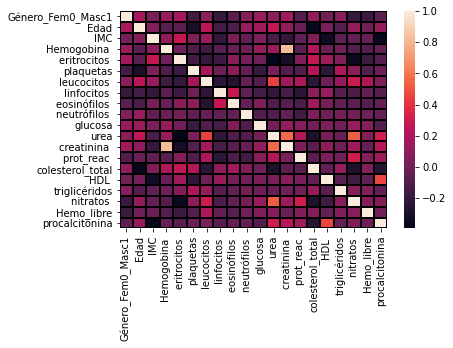

In [57]:
sns.heatmap(df2.corr(),linewidth=1,linecolor='black');

In [59]:
df2.corr()-df1.corr()

,Género_Fem0_Masc1,Edad,IMC,Hemogobina,eritrocitos,plaquetas,leucocitos,linfocitos,eosinófilos,neutrófilos,glucosa,urea,creatinina,prot_reac,colesterol_total,HDL,triglicéridos,nitratos,Hemo_libre,procalcitonina
Género_Fem0_Masc1,0.000000,0.371107,0.310997,-0.735548,0.041524,-0.085276,-0.009317,-0.244438,0.030146,0.116171,0.083070,-0.437995,-0.216880,-0.091836,0.178048,0.405749,-0.140126,-0.185470,-0.559454,-0.099753
Edad,0.371107,0.000000,0.117461,0.130391,-0.224076,-0.207090,0.455007,-0.282346,-0.127858,0.246131,0.200259,0.396971,0.134576,-0.136839,-0.510473,-0.070536,-0.112751,0.019725,0.065114,0.224249
IMC,0.310997,0.117461,0.000000,0.359452,0.043897,0.025779,0.270938,-0.263458,-0.135717,0.061565,0.135717,0.031275,-0.177305,-0.109365,0.225971,-0.306862,-0.080479,-0.205500,-0.048725,-0.499822
Hemogobina,-0.735548,0.130391,0.359452,0.000000,-0.065514,-0.032016,-0.357779,-0.051058,0.055636,-0.041382,0.063568,-0.355435,0.466637,0.049011,0.257343,0.362167,-0.315098,-0.132885,-0.558806,-0.128764
eritrocitos,0.041524,-0.224076,0.043897,-0.065514,0.000000,-0.177671,-0.180100,-0.196183,0.124646,0.039625,0.016640,-0.580942,-0.259435,-0.038402,0.230526,0.123958,0.101268,-0.246032,-0.295227,-0.154894
plaquetas,-0.085276,-0.207090,0.025779,-0.032016,-0.177671,0.000000,-0.119087,-0.173724,0.000295,0.122640,-0.157738,-0.002445,-0.016402,0.233284,0.354042,-0.297722,0.247581,-0.013548,0.144100,0.013351
leucocitos,-0.009317,0.455007,0.270938,-0.357779,-0.180100,-0.119087,0.000000,0.271408,0.128128,-0.540571,-0.199732,0.262286,0.110190,0.451422,-0.114012,0.072726,0.147988,0.333817,0.123104,-0.073175
linfocitos,-0.244438,-0.282346,-0.263458,-0.051058,-0.196183,-0.173724,0.271408,0.000000,0.065085,0.935617,0.009423,-0.228070,-0.353045,-0.258893,0.125281,0.053002,-0.103628,-0.231388,0.199718,0.231819
eosinófilos,0.030146,-0.127858,-0.135717,0.055636,0.124646,0.000295,0.128128,0.065085,0.000000,0.289052,-0.237924,-0.052162,0.017373,-0.001944,0.365706,-0.100777,-0.009219,-0.145202,0.159703,0.113264
neutrófilos,0.116171,0.246131,0.061565,-0.041382,0.039625,0.122640,-0.540571,0.935617,0.289052,0.000000,-0.224558,-0.071844,0.208765,-0.168441,0.014424,0.098781,0.053214,0.109945,-0.257681,-0.344654


TypeError: ignored

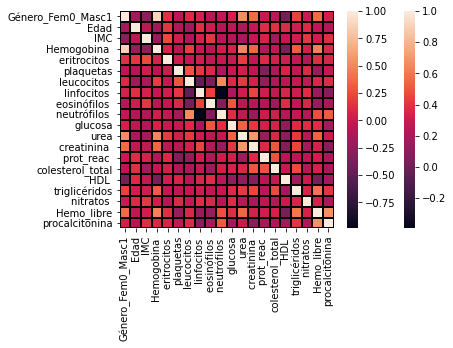

In [64]:
a=sns.heatmap(df2.corr(),linewidth=1,linecolor='black')-sns.heatmap(df1.corr(),linewidth=1,linecolor='black');